In [1]:
import wfdb as w
import pandas as pd
import matplotlib.pyplot as plt
import heartpy as hp
import numpy as np
from scipy import signal 
import seaborn as sns

In [2]:
# Read the signal
sig1, field1 = w.rdsamp("s1_high_resistance_bike")
sig2, field2 = w.rdsamp("s1_low_resistance_bike")
sig3, field3 = w.rdsamp("s1_walk")
sig4, field4 = w.rdsamp("s2_high_resistance_bike")
sig5, field5 = w.rdsamp("s2_low_resistance_bike")
sig6, field6 = w.rdsamp("s2_walk")
sig7, field7 = w.rdsamp("s3_high_resistance_bike")
sig8, field8 = w.rdsamp("s3_low_resistance_bike")
sig9, field9 = w.rdsamp("s3_run")
sig10, field10 = w.rdsamp("s3_walk")
sig11, field11 = w.rdsamp("s4_run")
sig12, field12 = w.rdsamp("s5_low_resistance_bike")
sig13, field13 = w.rdsamp("s5_run")
sig14, field14 = w.rdsamp("s6_low_resistance_bike")
sig15, field15 = w.rdsamp("s6_run")
sig16, field16 = w.rdsamp("s6_walk")
sig17, field17 = w.rdsamp("s8_run")
sig18, field18 = w.rdsamp("s8_walk")
sig19, field19 = w.rdsamp("s9_walk")

In [3]:
#Convert the signal into dataframe
signal_ = [sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,sig9,sig10,sig11,sig12,sig13,sig14,sig15,sig16,sig17,sig18,sig19]
ppg = []

for sig in signal_:
    sig = pd.DataFrame(sig)
    ppg.append(sig[1])
len(ppg)

19

In [4]:
# Preprocess function
def preprocess_ppg(df,fs="none",duration="none"):
    df.replace([np.inf, -np.inf], 0)
    data = df.to_numpy()
    data = data.flatten()
    data = np.nan_to_num(data)

    data_detrend = signal.detrend(data)
#     plt.figure()
    #plt.plot(data_detrend[0:2560])

    filtered_ppg = hp.filter_signal(data_detrend,
                                        cutoff=[0.8, 2.5],
                                        filtertype='bandpass',
                                        sample_rate=256,
                                        order=3,
                                        return_top=False)
#     plt.figure()
#     plt.plot(filtered_ppg[0:2000])

    wd, m = hp.process(filtered_ppg,256,report_time = True)
#     plt.figure()
#     plt.xlim(0, 2000)
#     hp.plotter(wd, m)

    return filtered_ppg

In [7]:
data =[]
for sig in ppg:
    d = preprocess_ppg(sig,fs=256)
    data.append(d)
    
len(data)


Finished in 0.545416 sec

Finished in 0.367229 sec

Finished in 0.399229 sec

Finished in 0.322793 sec

Finished in 0.230475 sec

Finished in 0.349277 sec

Finished in 0.113062 sec

Finished in 0.205982 sec

Finished in 0.339474 sec

Finished in 0.214940 sec

Finished in 0.171202 sec

Finished in 0.170353 sec

Finished in 0.128361 sec

Finished in 0.195377 sec

Finished in 0.245913 sec

Finished in 0.259993 sec


/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:232: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)



Finished in 0.258183 sec

Finished in 0.384705 sec

Finished in 0.144733 sec


19

In [8]:
# Extract Features in a window of 4 sec and overlap of 0.1
fs = 256
wd = []
m = []

for sig in data:
    w_,m_ = hp.process_segmentwise(sig,fs, segment_width=4, segment_overlap=0.1)
    wd.append(w_)
    m.append(m_)

/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:5216: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


In [9]:
def clean_data(m):
    df = pd.DataFrame(m) 
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(0)
    df = df.drop(["breathingrate","segment_indices"],1)
    return df

In [10]:
# Clean the data and combine to form a single dataframe
frames = []

for m_ in m:
    frames.append(clean_data(m_))

X = pd.concat(frames)
X.describe()

,bpm,ibi,sdnn,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2
count,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000
mean,104.792459,577.489324,88.229201,138.507782,0.834945,0.697198,59.564577,82.651134,58.668025,21609.443733,2.099841
std,21.451990,124.585357,52.747951,87.417926,0.278888,0.324700,46.360029,60.858309,53.825928,26640.022492,4.804172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.978208,502.790179,45.204337,71.424938,0.750000,0.500000,25.390625,36.239695,17.082867,2028.585379,0.751376
50%,106.666667,559.895833,82.633577,128.906250,1.000000,0.750000,46.875000,75.555398,41.075002,9670.438782,1.373168
75%,118.675497,640.625000,128.154373,194.186206,1.000000,1.000000,82.031250,124.591618,90.867133,34151.944915,2.214630
max,301.176471,1128.906250,287.109375,492.187500,1.000000,1.000000,287.109375,324.550964,288.167030,143831.751859,139.000000


In [11]:
# Apply K-means clustering 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
r = X["pnn50"].to_numpy().reshape(-1,1)
scaler = MinMaxScaler()
r = scaler.fit_transform(r)
r = pd.DataFrame(r)
r = r.replace([np.inf, -np.inf], np.nan)
r = r.fillna(0)
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(r)
centroids = kmeans.cluster_centers_
abs(centroids[0]-centroids[1])

array([0.60466943])

In [12]:
# Obtain the labels

labels = kmeans.predict(r)
print(len(labels))

1873


<Figure size 432x288 with 0 Axes>

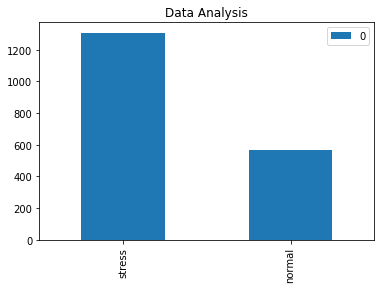

In [13]:
# Count the labels for 0 and 1
l = pd.DataFrame(labels)
c =l[0].value_counts()
df_plot  = pd.DataFrame([c[1],c[0]])
plt.figure()
df_plot.index=['stress','normal']

# Plot
df_plot.plot(kind='bar', title='Data Analysis')


In [14]:
# save the features and labels in Features.csv file

label = pd.DataFrame(labels,columns=['Label'])
label.shape
X["Label"] = l
X.head()
ans = X.to_csv('Feature.csv')

## TPOT

In [35]:
# TPOT

x_= X.drop("pnn50",1)
x_ = scaler.fit_transform(x_)
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 
from tpot import TPOTClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal 
import pickle


import sklearn.metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support 
y = l

x_ = X.drop('pnn50',1)
x_ = scaler.fit_transform(x_)

# print(x_.head())
def do_tpot(generations=5, population_size=10,X='',y=''):

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.80, test_size=0.20)

    tpot = TPOTClassifier(generations=generations, population_size=population_size, verbosity=2 ,cv=5)
    tpot.fit(X_train, y_train)
    print(tpot.score(X_test, y_test))
    tpot.export('tpot_pipeline.py')
    return tpot

tpot_classifer = do_tpot(generations=10, population_size=20,X=x_,y=l)

/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Imputing missing values in feature set


Generation 1 - Current best internal CV score: 0.9332597547380155
Generation 2 - Current best internal CV score: 0.9332597547380155
Generation 3 - Current best internal CV score: 0.9332597547380155
Generation 4 - Current best internal CV score: 0.9352686733556299
Generation 5 - Current best internal CV score: 0.9365975473801562
Generation 6 - Current best internal CV score: 0.9365975473801562
Generation 7 - Current best internal CV score: 0.9372664437012264
Generation 8 - Current best internal CV score: 0.9372664437012264
Generation 9 - Current best internal CV score: 0.9372664437012264
Generation 10 - Current best internal CV score: 0.9379331103678931

Best pipeline: GaussianNB(LinearSVC(XGBClassifier(SelectPercentile(input_matrix, percentile=67), learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=100, nthread=1, subsample=0.55), C=0.5, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05))
Imputing missing values in feature set
0.928


/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler




x_ = X.drop('pnn50',1)
x_ = scaler.fit_transform(x_)
X_train, X_test, y_train, y_test = train_test_split(x_, y,
                                                        train_size=0.80, test_size=0.20)

y_pred = tpot_classifer.predict(X_test)
print ("Accuracy is: ",  accuracy_score(y_test, y_pred))
print("F",f1_score(y_test, y_pred, average=None))

Imputing missing values in feature set
Accuracy is:  0.984
F [0.97727273 0.98765432]


/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Imputing missing values in feature set


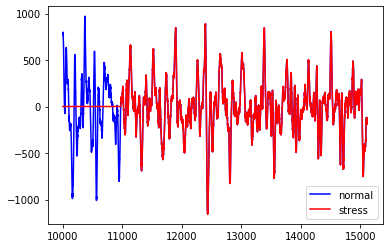

In [40]:
test_df = frames[5]
#test_df = test_df.drop("pnn50",1)
test_df = scaler.fit_transform(test_df)
test_df = pd.DataFrame(test_df)
dfnewHRV=test_df
predictor = tpot_classifer

dfnewHRV = dfnewHRV.fillna(dfnewHRV.mean())
dfnewPol = dfnewHRV.fillna(0)

pred = tpot_classifer.predict(dfnewPol)

stress_val = pred

x = round((4*256)-(0.1*256))
stress =  [ele for ele in stress_val for i in range(x) ]
df = ppg[5]
df.replace([np.inf, -np.inf], 0)
data = df.to_numpy()
data = data.flatten()
data = np.nan_to_num(data)
data_ppg = signal.detrend(data)

l = min(len(stress),len(data_ppg))
# stress[stress == 0] = np.nan
d = {'normal':data_ppg[0:l],'stress':stress[0:l]}
df = pd.DataFrame(d)
dfnewHRV = df

dfnewHRV.loc[dfnewHRV["stress"] == 1, 'stress'] = dfnewHRV['normal'] 
## all the data
# from itertools import cycle, islice
# my_colors = list(islice(cycle(['b', 'r', 'k']), None, len(dfnewHRV)))
# plot = dfnewHRV.plot(y=['interval in seconds',"stress"],color=my_colors)

# fig = plot.get_figure()
##  1000 data points
from itertools import cycle, islice
df = dfnewHRV.iloc[10000:15120]
my_colors = list(islice(cycle(['b', 'r']), None, len(df)))
plot = df.plot(y=['normal',"stress"],color=my_colors)

fig = plot.get_figure()

## XG Boost

In [45]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

X = x_
y = label 


y = y.to_numpy()
pdA = pd.DataFrame.from_records(X)

        
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print("Performing XG boositng")


gbreg = XGBClassifier(n_estimators=100,n_jobs=-1,learning_rate=0.1,verbose=True)

# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score
# ss=ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)
# scores = cross_val_score(gbreg, X,y, cv=ss,n_jobs=-1, verbose=1)
# print(np.mean(scores)) 
# print(scores) 

gbreg.fit(X_train,y_train)
y_pred=gbreg.predict(X_test)
print ("Accuracy is: ",  accuracy_score(y_test, y_pred))
print("F",f1_score(y_test, y_pred, average=None))
print("Done!")

Performing XG boositng
Accuracy is:  0.9253333333333333
F [0.87719298 0.94636015]
Done!


## Random Forest

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from sklearn.metrics import f1_score

x_ = pd.DataFrame(x_)
x_ = x_.replace([np.inf, -np.inf], np.nan)
x_ = x_.fillna(0)
X = x_
y = label

y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print("Performing random Forests")

rfreg1= RandomForestClassifier(n_jobs=-1, n_estimators=50, oob_score = True) 
rfreg2= RandomForestClassifier(n_jobs=-1, n_estimators=80, oob_score = True) 
rfreg3= RandomForestClassifier(n_jobs=-1, n_estimators=100, oob_score = True)
vot= VotingClassifier(estimators=[('r1', rfreg1), ('r2', rfreg2), ('r3', rfreg3)], voting='hard')
vot= vot.fit(X_train, y_train)

# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score
# ss=ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
# scores = cross_val_score(vot, X,y, cv=ss,n_jobs=-1, verbose=1)
# print(np.mean(scores))
# print(scores) 

# rfreg.fit(X_train,y_train)
y_pred=vot.predict(X_test)
print ("Accuracy is: ",  accuracy_score(y_test, y_pred))
print("F", f1_score(y_test, y_pred, average=None))

print("Done!")


Performing random Forests


/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy is:  0.92
F [0.86607143 0.94296578]
Done!


In [49]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale



X = x_
y = label

y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print("Performing gradient boositng")

gbreg1 = GradientBoostingClassifier(n_estimators= 20, max_depth= 10, min_samples_split=2, min_samples_leaf=3, learning_rate=0.1, subsample=0.5)
gbreg2= GradientBoostingClassifier(n_estimators= 25, max_depth= 10, min_samples_leaf=5, min_samples_split=2, learning_rate=0.1, subsample=0.5)
gbreg3 = GradientBoostingClassifier(n_estimators= 20, max_depth= 10, min_samples_leaf=5, min_samples_split=2, learning_rate=0.1, subsample=0.5)
# gbreg4 = GradientBoostingClassifier(random_state=44,n_estimators= 35)
# gbreg5 = GradientBoostingClassifier(random_state=55,n_estimators= 40)
vot= VotingClassifier(estimators=[('r1', gbreg1), ('r2', gbreg2), ('r3', gbreg3)], voting= 'hard')

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
ss=ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)
scores = cross_val_score(vot, X,y, cv=ss,n_jobs=-1, verbose=1)
print(np.mean(scores))
print(scores) 

vot= vot.fit(X_train, y_train)
# gbreg.fit(X_train,y_train) 
y_pred=vot.predict(X_test)
print ("Accuracy is: ",  accuracy_score(y_test, y_pred))
print("F",f1_score(y_test, y_pred, average=None))
# conf=confusion_matrix(y_test,y_pred , sample_weight=None)


Performing gradient boositng


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mannika/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9301333333333333
[0.91733333 0.928      0.93866667 0.944      0.944      0.928
 0.904      0.92       0.93333333 0.944     ]
Accuracy is:  0.912
F [0.85333333 0.93714286]
